# Mobile Price Classification FInal Project

Dataset URL : https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv

Data Description:
- `battery_power`<code>&nbsp;</code>: Total energy a battery can store in one time measured in mAh
- `blue`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has bluetooth or not
- `clock_speed`<code>&nbsp;&nbsp;&nbsp;</code>: Speed at which microprocessor executes instructions
- `dual_sim`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has dual sim support or not
- `fc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Front Camera mega pixels
- `four_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 4G or not
- `int_memory`<code>&nbsp;&nbsp;&nbsp;&nbsp;</code>: Internal Memory in Gigabytes
- `m_dep`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Mobile Depth in cm
- `mobile_wt`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Weight of mobile phone
- `n_cores`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Number of cores of processor
- `pc`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Primary Camera mega pixels
- `px_height`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Height
- `px_width`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Pixel Resolution Width
- `ram`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Random Access Memory in Megabytes
- `sc_h`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Height of mobile in cm
- `sc_w`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Screen Width of mobile in cm
- `talk_time`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: longest time that a single battery charge will last when you are
- `three_g`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has 3G or not
- `touch_screen`<code>&nbsp;&nbsp;</code>: Has touch screen or not
- `wifi`<code>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</code>: Has wifi or not
- `price_range`<code>&nbsp;&nbsp;&nbsp;</code>: This is the target variable with value of 0 (low cost), 1 (medium cost), 2 (high cost) and 3 (very high cost). `(Target Variable)`

### Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

### Dataframe Initialization

In [2]:
df = pd.read_csv('train.csv')
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


## Exploratory Data Analysis (EDA)

### Data Cleaning

In [3]:
# Check for missing values
df.isnull().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [4]:
# Check for duplicate values
df.duplicated().any()

False

In [5]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


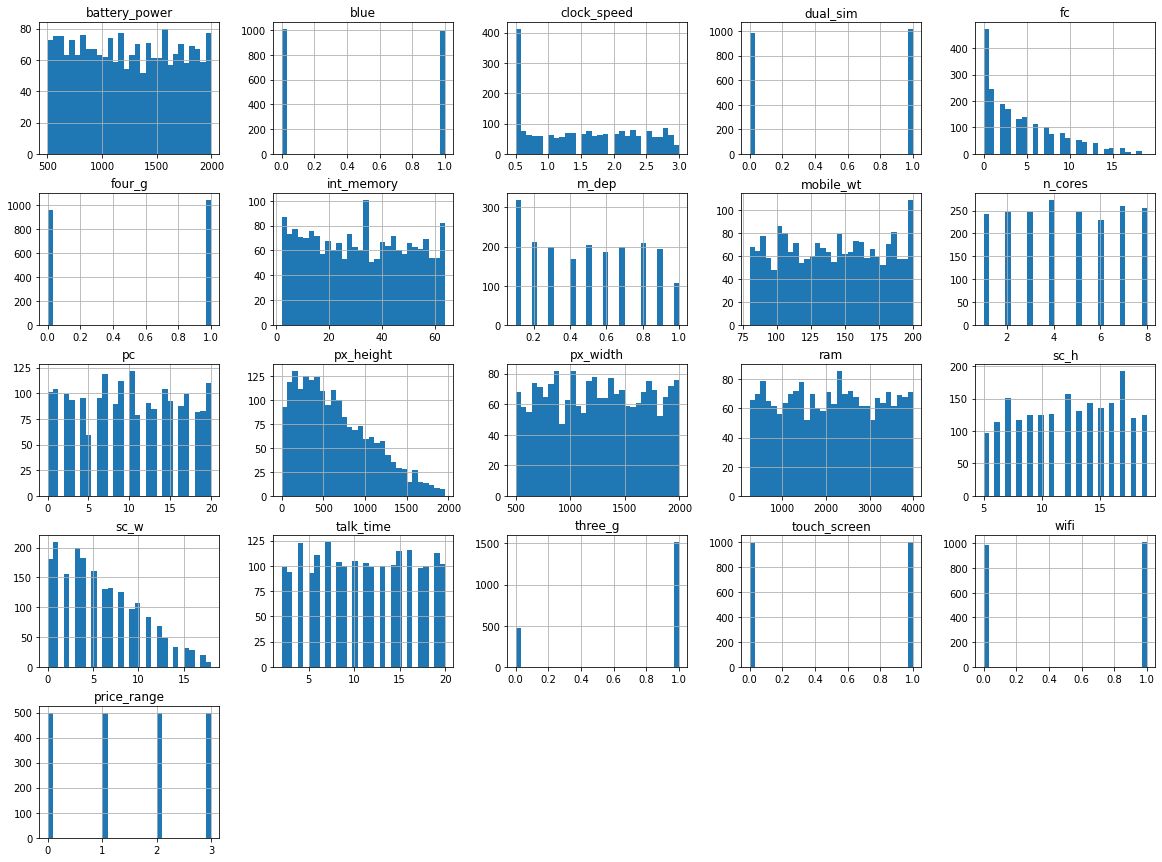

In [6]:
df.hist(figsize=(20,15), bins=30)
plt.show()

Dari visualisasi diatas dapat perkirakan bahwa kolom `fc` memiliki ouliers

In [7]:
# Loop through each column and check for outliers
for i in range (len(df.columns)):
  q_1, q_3 = np.percentile(df[df.columns[i]], [25, 75])
  iqr = q_3 - q_1
  fLow = q_1 - (1.5 * iqr)
  fHigh = q_3 + (1.5 * iqr)
  outliers = df[df.columns[i]][(
      (df[df.columns[i]] < (fLow)) | (df[df.columns[i]] > (fHigh)))]
  if outliers.max() > 0:
    df = df.loc[(df[df.columns[i]] >= (fLow)) & (df[df.columns[i]] <= (fHigh))]
    print(f'{df.columns[i]} : ')
    print('number of outliers: '+ str(len(outliers))+ ' (drop)')
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))
  if outliers.max() == 0:
    print(f'{df.columns[i]} : ')
    print('number of outliers: '+ str(len(outliers)))
    print('max outlier value: '+ str(outliers.max()))
    print('min outlier value: '+ str(outliers.min()))

fc : 
number of outliers: 18 (drop)
max outlier value: 19
min outlier value: 17
px_height : 
number of outliers: 2 (drop)
max outlier value: 1960
min outlier value: 1949
three_g : 
number of outliers: 474
max outlier value: 0
min outlier value: 0


<AxesSubplot:xlabel='three_g', ylabel='count'>

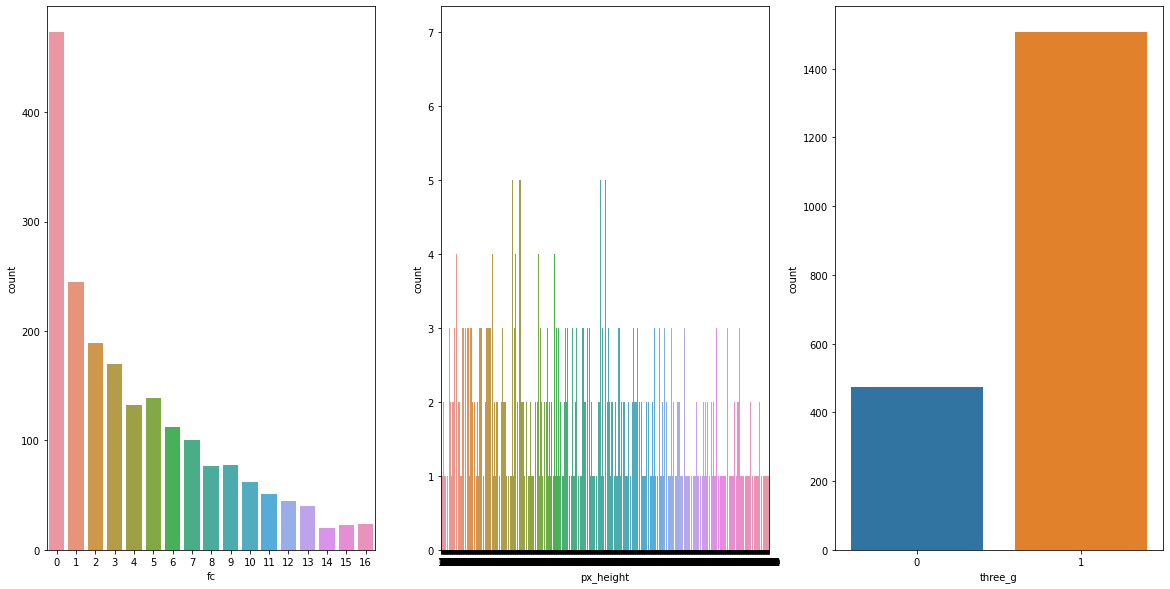

In [8]:
fig, axs = plt.subplots(ncols=3, figsize=(20,10))
sns.countplot(x='fc', data=df, ax=axs[0])
sns.countplot(x='px_height', data=df, ax=axs[1])
sns.countplot(x='three_g', data=df, ax=axs[2])

- Outliers pada kolom `three_g` diabaikan karena data tersebut masih masuk akal.
- Baris yang memiliki outliers Pada kolom `fc` dan `px_height` akan di drop karena data tersebut tidak masuk akal dan total kolom yang didrop hanya <b>1%</b> dari keseluruhan total data.

### Correlation

<AxesSubplot:>

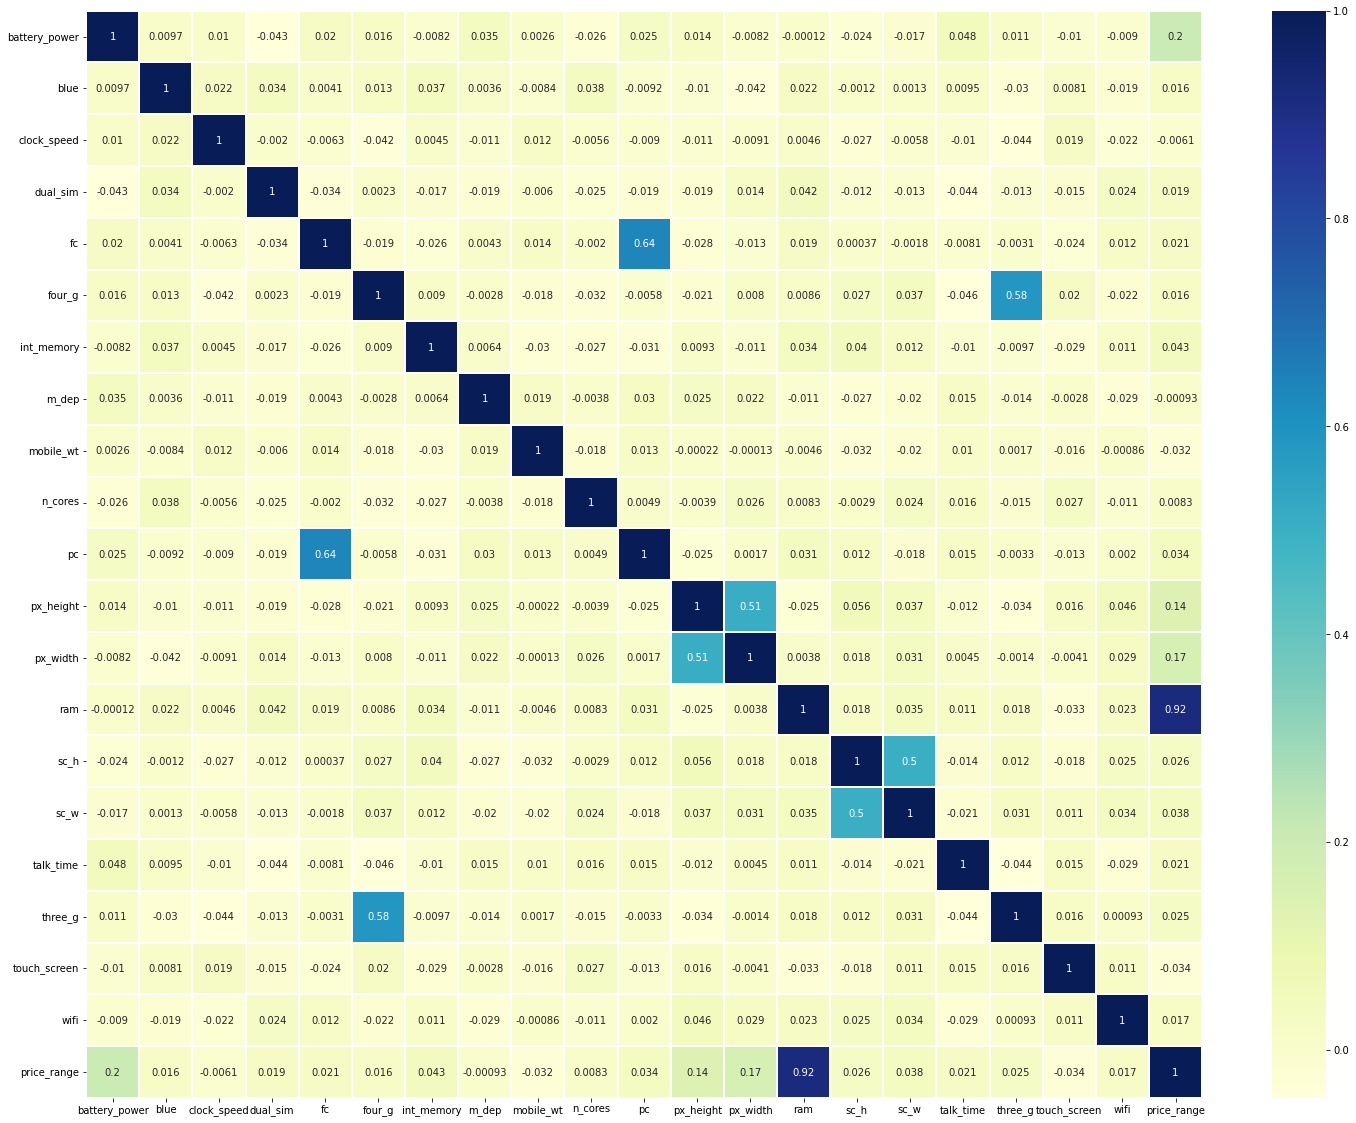

In [9]:
plt.figure(figsize=(25, 20))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu', linewidths=0.2)

In [10]:
abs(df.corr()['price_range']).sort_values(ascending=False)[0:11]

price_range      1.000000
ram              0.917009
battery_power    0.200763
px_width         0.165132
px_height        0.144277
int_memory       0.043458
sc_w             0.038076
touch_screen     0.033888
pc               0.033871
mobile_wt        0.031628
sc_h             0.025641
Name: price_range, dtype: float64

- Dari visualisasi diatas dapat disimpulkan bahwa hanya terdapat 1 kolom yang memiliki korelasi kuat dengan label (lebih dari 0.8).
- Pada pengujian ini dataset akan dipisah menjadi 2 yaitu dataset dengan semua kolom dan dataset dengan 10 kolom (50%) dengan korelasi terbaik.

In [11]:
# Make new dataset with only high correlation features
dfFiltered = df[['battery_power', 'fc', 'int_memory', 'mobile_wt', 'pc', 'px_height', 'px_width', 'ram', 'three_g', 'sc_w', 'price_range']]
dfFiltered.head()

,battery_power,fc,int_memory,mobile_wt,pc,px_height,px_width,ram,three_g,sc_w,price_range
0,842,1,7,188,2,20,756,2549,0,7,1
1,1021,0,53,136,6,905,1988,2631,1,3,2
2,563,2,41,145,6,1263,1716,2603,1,2,2
3,615,0,10,131,9,1216,1786,2769,1,8,2
4,1821,13,44,141,14,1208,1212,1411,1,2,1


In [12]:
# Export dataset to csv
dfFiltered.to_csv('filtered.csv', index=False)
df.to_csv('original.csv', index=False)